In [1]:
import warnings
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

from keras.models import load_model

# 본인이 쓴 글씨 불러오기

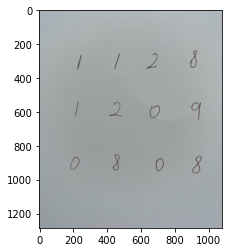

In [2]:
img = cv2.imread('/content/drive/MyDrive/deep-learning-from-scratch-master/real.jpg')

plt.imshow(img)

흑백으로 바꿔줍시다

(1285, 1079)


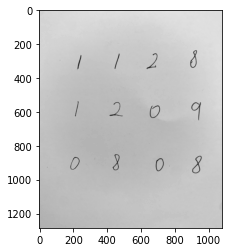

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')

# 글씨 하나하나 cut

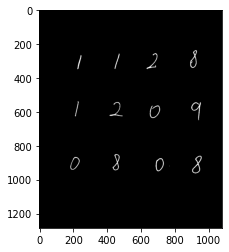

In [4]:
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap = 'gray')
plt.show()

[(769, 918, 2, 3), (688, 874, 48, 77), (185, 866, 55, 75), (903, 859, 56, 104), (433, 850, 42, 95), (653, 563, 61, 74), (898, 544, 56, 106), (416, 543, 78, 83), (212, 537, 22, 90), (226, 266, 24, 84), (446, 256, 29, 92), (634, 255, 64, 94), (892, 237, 39, 104)]
13


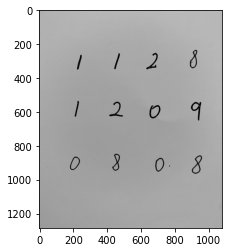

In [5]:
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
img_contours = cv2.drawContours(img_gray, contours, -1, (0,255,0), 4)

plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
rects = [cv2.boundingRect(each) for each in contours]
print(rects)
print(len(rects)) # 12개 나와야 정상

In [6]:
find = [w*h for (x,y,w,h) in rects]
find.sort()
print(find) 

[6, 1980, 2016, 2668, 3696, 3990, 4056, 4125, 4514, 5824, 5936, 6016, 6474]


이상하게 작은 크기 가진 애가 범인이다.

In [7]:
rects.pop(0)
print(rects)
print(len(rects))

[(688, 874, 48, 77), (185, 866, 55, 75), (903, 859, 56, 104), (433, 850, 42, 95), (653, 563, 61, 74), (898, 544, 56, 106), (416, 543, 78, 83), (212, 537, 22, 90), (226, 266, 24, 84), (446, 256, 29, 92), (634, 255, 64, 94), (892, 237, 39, 104)]
12


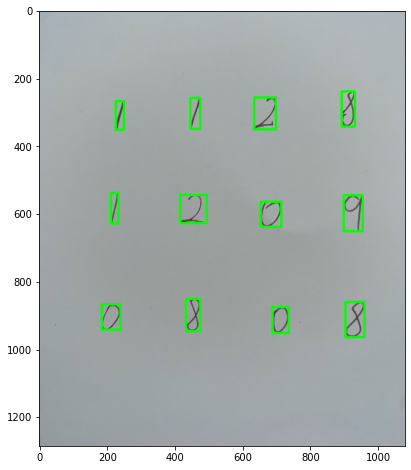

In [8]:
my_test = []
img_for_class = img_gray.copy()

margin_pixel = 50 # 여백

for rect in rects:
    # 하나씩 test 데이터로 만들어줍시다.
    my_test.append(
        img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel, 
                      rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel])

    # 원본 이미지에 이전 셀에서 구한 좌표 기준으로 박스를 그려보자
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

plt.figure(figsize=(12,8))
plt.imshow(img, cmap='gray');

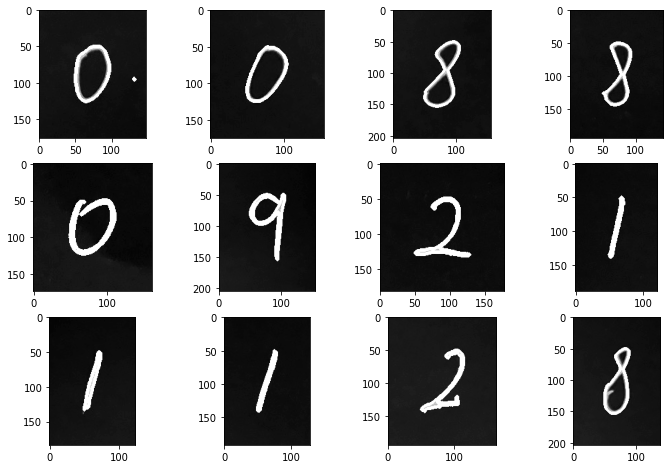

In [9]:
cnt = 0
rows = 3
cols = 4

plt.figure(figsize=(12,8))

for sample in my_test:
    cnt += 1
    plt.subplot(rows, cols, cnt)
    plt.imshow(sample, cmap='Greys')

plt.show()

얘는 28*28로 resize를 좀 해주면 좋을 것 같다..

28 * 28 일 때 한번 봅시다.


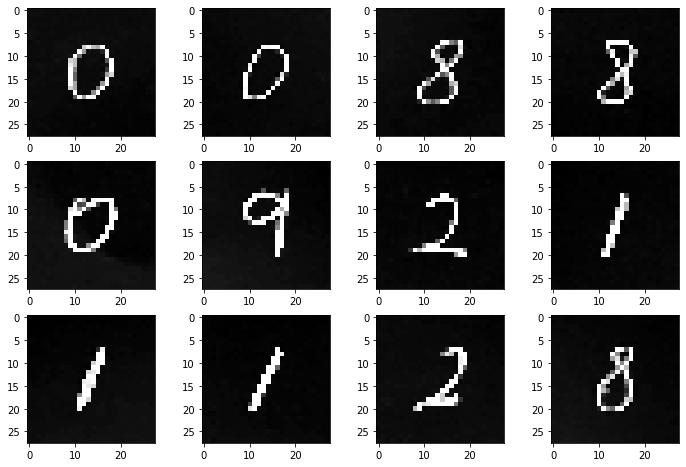

In [10]:
cnt = 0
rows = 3
cols = 4

plt.figure(figsize=(12,8))

for sample in my_test:
    cnt += 1
    plt.subplot(rows, cols, cnt)
    plt.imshow(cv2.resize(sample,(28,28)), cmap='Greys')

plt.show()

# 훈련된 모델로 예측

In [11]:
model_path = '/content/drive/MyDrive/deep-learning-from-scratch-master/SimpleCNN.h5'
model = load_model(model_path)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               752760    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 766,702
Trainable params: 766,702
Non-trainable params: 0
__________________________________________________

(177, 148)
(28, 28)
(1, 28, 28, 1)


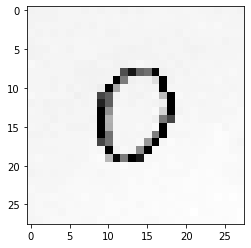

In [12]:
print(my_test[0].shape)

new = cv2.resize(my_test[0], (28, 28))
print(new.shape)
plt.imshow(new, cmap='gray')

# 모델에는 이렇게 들어가야함
new = new.reshape(1, 28, 28, 1)
new = new.astype('float32') / 255
print(new.shape)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


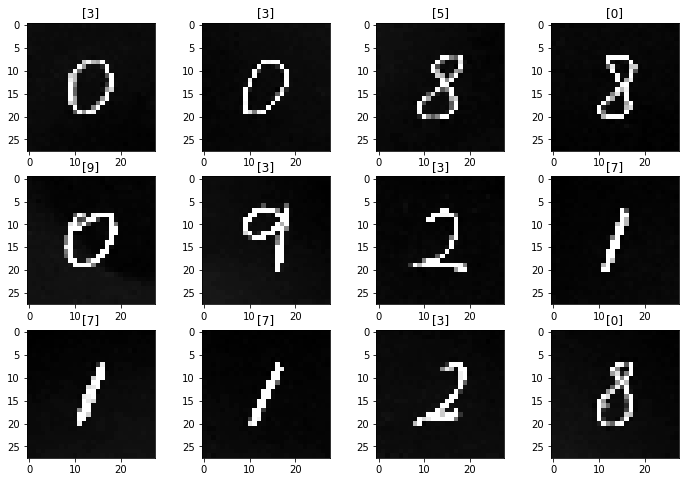

In [19]:
cnt = 0
rows = 3
cols = 4

plt.figure(figsize=(12,8))

for sample in my_test:
    cnt += 1
    plt.subplot(rows, cols, cnt)

    new = cv2.resize(sample, (28, 28))
    plt.imshow(new, cmap='Greys')
        
    new = new.astype('float32') / 255
    new = new.reshape((1, 28, 28, 1)) 

    plt.title(model.predict_classes(new))
    
plt.show()

과적합인듯 ㅋ;